In [ ]:
%matplotlib inline

Here's a step-by-step guide explaining the code to train a Fashion MNIST model in Jupyter Notebook:

# **Importing the Required Libraries**

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import random

from keras.datasets import fashion_mnist
from keras.models import Sequential

from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In this section, we import the necessary libraries. numpy provides support for mathematical operations, matplotlib.pyplot is used for data visualization, random is used for generating random numbers, fashion_mnist is imported to access the Fashion MNIST dataset, Sequential is the model type to be used, Dense, Dropout, and Activation are types of layers to be used in our model, and np_utils provides utility functions for manipulating data.

# **Loading the Fashion MNIST Dataset**

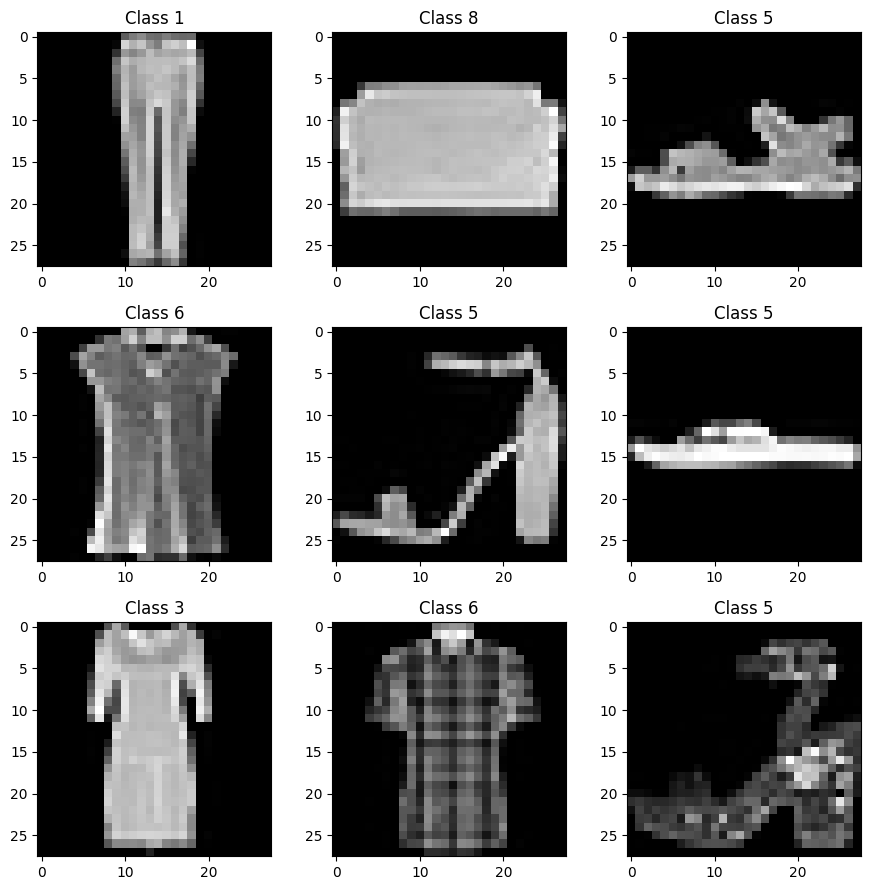

In [ ]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(Y_train[num]))

plt.tight_layout()

In this section, we load the Fashion MNIST dataset using the load_data() function provided by fashion_mnist. The data is split into training and testing sets, and we store them in X_train, y_train, X_test, and y_test variables. We then print this data to get a feel for what it looks like, and to test if it worked.

# **Preprocessing the Data**

In [ ]:
# Reshape and normalize the input data
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

# Convert the labels to one-hot encoded vectors
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)


In this section, we preprocess the data before feeding it to the model. First, we reshape the input data from a 3D array (images) to a 2D array (vectors) using reshape(). Then, we normalize the pixel values by dividing them by 255 to scale them between 0 and 1. Finally, we one-hot encode the labels using to_categorical() from np_utils.

# **Creating the Model Architecture**

In [ ]:

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))


In this section, we create the model architecture using the Sequential class. We add layers to the model using add(). The model consists of three types of layers: Dense, Activation, and Dropout. The Dense layers are fully connected layers, the Activation layers apply activation functions, and the Dropout layers introduce regularization to prevent overfitting. The final layer uses the softmax activation function for multi-class classification.

# **Compiling the Model**

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:

history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 13s 26ms/step - loss: 0.5169 - accuracy: 0.8151 - val_loss: 0.4224 - val_accuracy: 0.8481
Epoch 2/10
469/469 [==============================] - 12s 25ms/step - loss: 0.3837 - accuracy: 0.8597 - val_loss: 0.3745 - val_accuracy: 0.8645
Epoch 3/10
469/469 [==============================] - 11s 24ms/step - loss: 0.3487 - accuracy: 0.8712 - val_loss: 0.3905 - val_accuracy: 0.8588
Epoch 4/10
469/469 [==============================] - 10s 22ms/step - loss: 0.3284 - accuracy: 0.8785 - val_loss: 0.3486 - val_accuracy: 0.8733
Epoch 5/10
469/469 [==============================] - 18s 39ms/step - loss: 0.3140 - accuracy: 0.8837 - val_loss: 0.3383 - val_accuracy: 0.8769
Epoch 6/10
469/469 [==============================] - 12s 26ms/step - loss: 0.2980 - accuracy: 0.8876 - val_loss: 0.3317 - val_accuracy: 0.8787
Epoch 7/10
469/469 [==============================] - 11s 25ms/step - loss: 0.2845 - accuracy: 0.8939 - val_loss: 0.3382 - val_accuracy:

In this section, we compile the model by specifying the loss function, optimizer, and metrics to be used during training. We use categorical cross-entropy as the loss function, the Adam optimizer, and accuracy as the metric to evaluate the model's performance.

# **Training the Model**

In [ ]:

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

Test loss: 0.321147620677948
Test accuracy: 0.8863000273704529
